<a href="https://colab.research.google.com/github/jeong1suk/Capstone_ElectricCar/blob/beoman/yolov5_%ED%82%A5%EB%B3%B4%EB%93%9C%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%B6%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Nov 19 04:53:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 13966, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 13966 (delta 107), reused 98 (delta 71), pack-reused 13809
Receiving objects: 100% (13966/13966), 13.58 MiB | 29.58 MiB/s, done.
Resolving deltas: 100% (9562/9562), done.


In [3]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 4.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 1.6 MB 44.7 MB/s 


In [4]:
%cd /content/
!unzip -qq "/content/dataset.zip"

/content


In [5]:
%cd /content/yolov5/

# 욜로v5_s로 학습 
!python train.py --img 416 --batch 16 --epochs 18 --data /content/dataset/data.yaml --cfg ./models/yolov5m.yaml --weights yolov5m.pt --name number_yolov5m_results

/content/yolov5
train: weights=yolov5m.pt, cfg=./models/yolov5m.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=18, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=number_yolov5m_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-263-g0307954 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou

/content


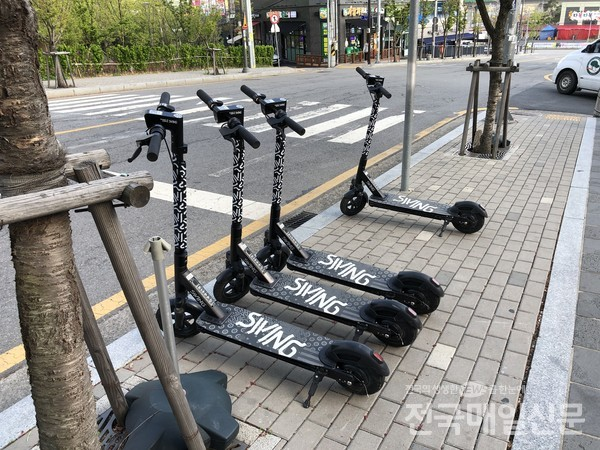

/content
/content/yolov5
detect: weights=['/content/yolov5/runs/train/number_yolov5m_results/weights/best.pt'], source=/content/qwer.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=ele, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-263-g0307954 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20877180 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/qwer.jpg: 416x416 3 kickboards, 18.3ms
Speed: 0.4ms pre-process, 18.3ms inference, 1.4ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/ele9
1 labels saved to runs/detect/ele9/labels


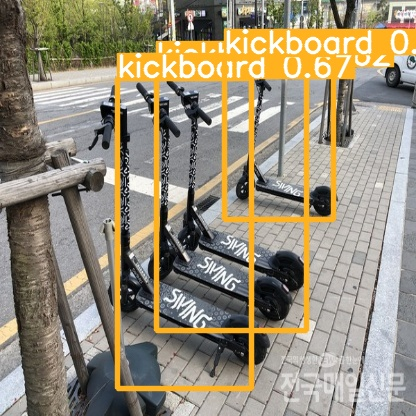

In [16]:
from IPython.display import Image
import os
%cd /content/
import cv2
from google.colab.patches import cv2_imshow


img = cv2.imread('/content/905316_596552_3842.jpg')
cv2_imshow(img)
reimg = cv2.resize(img, dsize = (416,416))
%cd /content/
cv2.imwrite("qwer.jpg", reimg)
%cd /content/yolov5/


val_img_path = '/content/qwer.jpg'

weights_path = '/content/yolov5/runs/train/number_yolov5m_results/weights/best.pt'

!python detect.py --weights "{weights_path}" --img 416 --conf 0.6 --source "{val_img_path}" --save-crop --save-txt --name "ele" --save-conf        #70% 이상이면 성공



detect_img_path = '/content/yolov5/runs/detect/ele9'           
Image(os.path.join(detect_img_path, os.path.basename(val_img_path)))

In [17]:

!zip -r /content/yolov5.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/models/ (stored 0%)
  adding: content/yolov5/models/yolov5m.yaml (deflated 60%)
  adding: content/yolov5/models/common.py (deflated 71%)
  adding: content/yolov5/models/yolov5l.yaml (deflated 61%)
  adding: content/yolov5/models/yolo.py (deflated 67%)
  adding: content/yolov5/models/yolov5s.yaml (deflated 60%)
  adding: content/yolov5/models/segment/ (stored 0%)
  adding: content/yolov5/models/segment/yolov5m-seg.yaml (deflated 60%)
  adding: content/yolov5/models/segment/yolov5l-seg.yaml (deflated 60%)
  adding: content/yolov5/models/segment/yolov5x-seg.yaml (deflated 60%)
  adding: content/yolov5/models/segment/yolov5s-seg.yaml (deflated 60%)
  adding: content/yolov5/models/segment/yolov5n-seg.yaml (deflated 60%)
  adding: content/yolov5/models/experimental.py (deflated 59%)
  adding: content/yolov5/models/yolov5x.yaml (deflated 60%)
  adding: content/yolov5/models/hub/ (stored 0%)
  adding: content/yolov5/models/hub/yolo